In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve
from scipy.integrate import quad
import math
from matplotlib.legend_handler import HandlerPathCollection
import matplotlib.collections as mcol
import matplotlib.transforms as mtransforms


In [3]:
shape_pts = np.array([[-8,1],[-6,10],[-5,-7],[0,-5],[1,9],[2,-8],[3,28],[5,-23],[7,12],[9,1],[10,10],[12,15],[14,18],[15,10]])

x = shape_pts[:,0]
y = shape_pts[:,1]

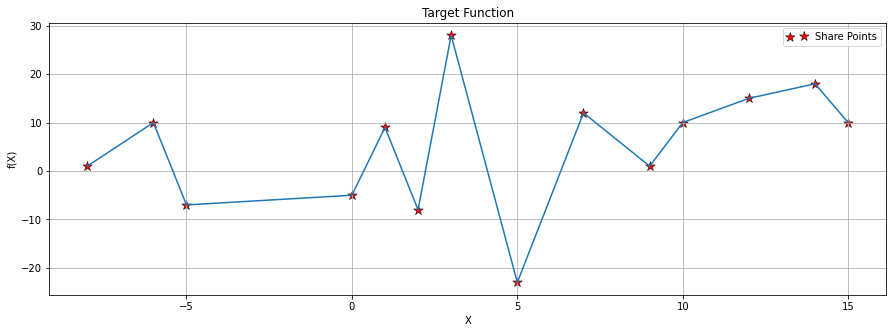

In [3]:
'''Generate the target function f'''

%matplotlib inline
def TargetFunction(x,y,markersize):
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(5)
    plt.plot(x,y)
    p1=plt.scatter(x,y,marker = '*',s=markersize,edgecolors = 'black', linewidth=.5,c = 'red')
    plt.legend([p1],['Share Points'],scatterpoints=2,loc ="upper right")
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Target Function')
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt


f = TargetFunction(x,y,markersize = 100)


5
5
5
5
5
3
3
3


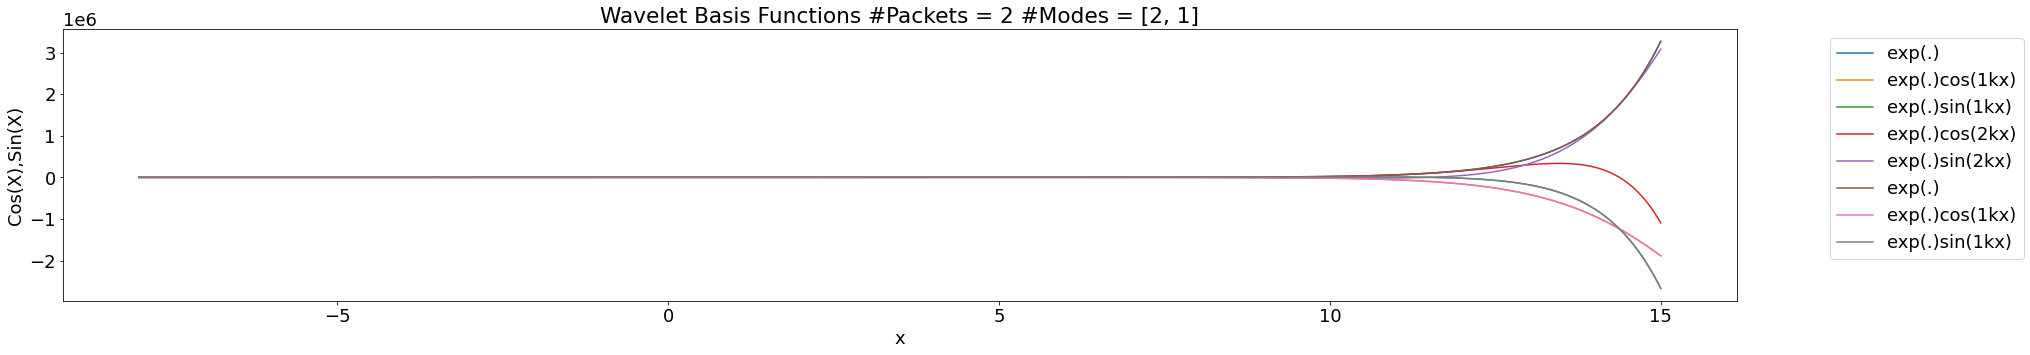

In [36]:
'''Build the basis functions'''


m=1000
x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
x_new=np.linspace(x_min, x_max, m)



wavelength = x_new[-1] - x_new[0]
Kappa=2*(np.pi)/wavelength

N = [2,1]

# def WaveletBasis(kappa, bunch_pts, N, sigma, phase_shift, x_min, x_max):
#     for i in N:
#         x_tilde_pts=np.linspace(x_min, x_max, N[i])
#         A=np.zeros((len(x_tilde_pts),2*N[i]+1))
#         for i in range (len(x_tilde_pts)):
#             for j in range((2*N[i]+1)):
#                 if (j==0):
#                     A[i,j]=1*np.exp(x_tilde_pts[i])
#                 elif (j%2)==1:
#                     A[i,j]=np.exp(x_tilde_pts[i])*np.cos(((j//2)+1)*Kappa*x_tilde_pts[i])
#                 elif (j%2)==0:
#                     A[i,j]=np.exp(x_tilde_pts[i])*np.sin((j//2)*Kappa*x_tilde_pts[i])
#     return np.array(A)


def WaveletBasis(kappa, bunch_pts, N, sigma, shift, x_min, x_max):
    x_tilde_pts = np.linspace(x_min,x_max,m)
    
    
    for i in range(0,bunch_pts*((2*N)+1)):
        
    



def Plot_fourierbasis(function,x_pts):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    for k in function:
        for i in range(len(k[0])):
            print(len(k[0]))
            if i==0:
                plt.plot(x_pts,k[:,0],label='exp(.)')
            elif i%2==1:
                plt.plot(x_pts,k[:,i], label='exp(.)cos(%ikx)'%(((i/2)+0.5)))
            elif i%2==0 and i!=0:
                plt.plot(x_pts,k[:,i], label='exp(.)sin(%ikx)'%(i/2))
            for j in range(len(k[0])//2):
                plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
            plt.xlabel('x'); plt.ylabel('Cos(X),Sin(X)')
            plt.title('Wavelet Basis Functions #Packets = '+str(len(N))+' #Modes = '+str(N))
            plt.rcParams.update({'font.size': 18})
    return plt.show()

new_A=[]
for i in N:
    A = FourierBasis(x_new,i,Kappa)
    new_A.append(A)
    x=A.shape
    A = np.empty(x)

plotf = new_A

Plot_fourierbasis(plotf,x_new)


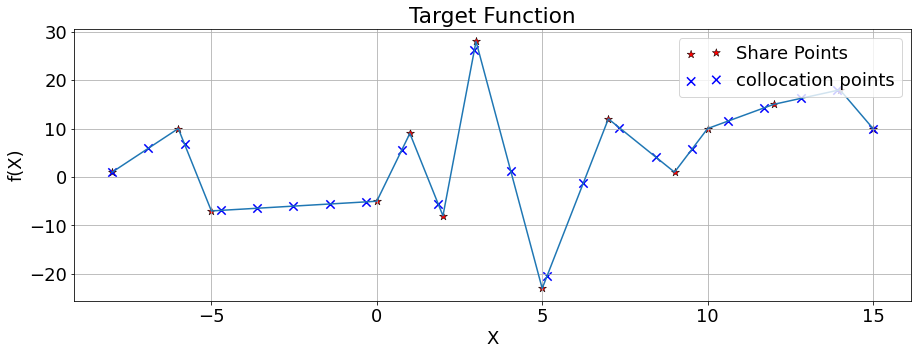

In [13]:
x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
m = 22
assert m >= len(shape_pts)

u = interpolate.interp1d(x, y, kind='linear',fill_value='array-like')
x_tilde_pts = np.linspace(x_min, x_max, m)

y_new = u(x_tilde_pts)


markersize = 70


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(x,y)
p1=plt.scatter(x,y,marker = '*',s=markersize,edgecolors = 'black', linewidth=.5,c = 'red')
p2 = plt.scatter(x_tilde_pts,y_new, marker='x',s=markersize,c='blue')
plt.legend([p1,p2],['Share Points','collocation points'],scatterpoints=2,loc ="upper right")
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Target Function')
plt.rcParams.update({'font.size': 18})
plt.grid()